In [1]:
#import dependencies

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#read the data
data = pd.read_csv('http://bit.ly/w-data')

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Text(0, 0.5, 'Scores')

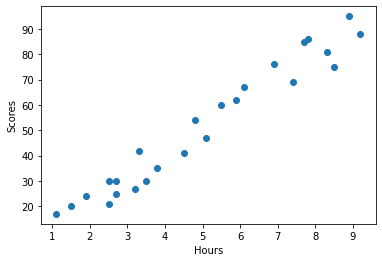

In [7]:
#visualize data using scatter plot

plt.scatter(data['Hours'],data['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores')

In [8]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

#splitting data into train-test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [9]:
# initialising model

model = LinearRegression()

# fitting model on train set
model.fit(x_train,y_train)

#printing model attributes
print("model coefficient: ",model.coef_)
print("intercept : ",model.intercept_)

model coefficient:  [9.93985842]
intercept :  0.6026085502480356


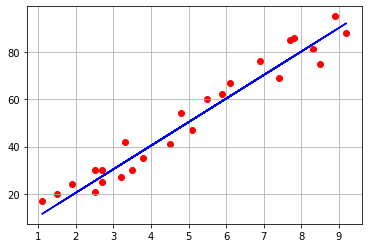

In [10]:
fit_line = model.intercept_ + model.coef_ * x 

#visualize the fit
plt.scatter(x, y, color = 'red')
plt.plot(x, fit_line, color = 'blue')
plt.grid()
plt.show()


In [11]:
# predicting on test set

y_pred = model.predict(x_test)
y_pred

array([77.13951842, 55.27182989, 19.48833956, 33.40414135, 25.45225461,
       48.31392899, 32.41015551, 92.04930606])

In [12]:
# finding how further predictions are from actual values

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print(f'mean absolute error:',mean_absolute_error(y_test,y_pred))
print(f'mean squared error:',mean_squared_error(y_test,y_pred))

mean absolute error: 5.673681093584527
mean squared error: 34.63333536891794


In [13]:
print(f'Train score: {model.score(x_train,y_train)}')
print(f'Test score: {model.score(x_test,y_test)}')


Train score: 0.9562415130601505
Test score: 0.937618668703964


In [14]:
# predicting score if a student studies for 9.25 hrs in a day

hours = [[9.25]]
predicted_score = model.predict(hours)
print("Predicted score will be {} if a student study for 9.25 hrs in a day".format(predicted_score))

Predicted score is [92.54629898] if a student study for 9.25 hrs in a day
